# Student Information
Name: Abner Tellez Sazo

Student ID: 106065434

---

### Instructions

- Download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read what the dataset is about on the link provided before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation techniques learned in the [first lab session](https://goo.gl/Sg4FS1) on the new dataset. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 80% of your grade!


- After you have completed the operations, you should attempt the **bonus exercises** provided in the [notebook](https://goo.gl/Sg4FS1) we used for the first lab session. There are six (6) additional exercises; attempt them all, as it is part of your grade (10%). 


- You are also expected to tidy up your notebook and attempt new data operations that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade.


- After completing all the above tasks, you are free to remove this header block and submit your assignment following the guide provided in the `README.md` file of the assignment's [repository](https://github.com/omarsar/data_mining_hw_1). 

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import math
%matplotlib inline

# TA helpers
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

# My helpers
import helpers.csv_constructor as cc

#URL Data set
DATA_SET_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip"


# 1. Data source and 2. data preparation

In [3]:
# Load and prepare data directly the dataset URL
cc.download_zip(DATA_SET_URL) 

Extracting files...
Creating csv...
Done!


In [4]:
# Negative = 0, Positive = 1
categories = ["Negative","Positive"]

# 3. Converting dataset into Pandas dataframe

In [5]:
# Obtain the data trail using csv file in "dataset" folder
X = pd.read_csv("dataset/dataset.csv",delimiter="|")

In [6]:
# Show data_train and data_train size
print(X)

            Source                                           Sentence  Score
0     amazon_cells  So there is no way for me to plug it in here i...      0
1     amazon_cells                        Good case, Excellent value.      1
2     amazon_cells                             Great for the jawbone.      1
3     amazon_cells  Tied to charger for conversations lasting more...      0
4     amazon_cells                                  The mic is great.      1
5     amazon_cells  I have to jiggle the plug to get it to line up...      0
6     amazon_cells  If you have several dozen or several hundred c...      0
7     amazon_cells        If you are Razr owner...you must have this!      1
8     amazon_cells                Needless to say, I wasted my money.      0
9     amazon_cells                   What a waste of money and time!.      0
10    amazon_cells                    And the sound quality is great.      1
11    amazon_cells  He was very impressed when going from the orig...      1

In [7]:
X['Score'].replace([0], 'Negative',inplace=True)
X['Score'].replace([1], 'Positive',inplace=True)

In [8]:
X

,Source,Sentence,Score
0,amazon_cells,So there is no way for me to plug it in here i...,Negative
1,amazon_cells,"Good case, Excellent value.",Positive
2,amazon_cells,Great for the jawbone.,Positive
3,amazon_cells,Tied to charger for conversations lasting more...,Negative
4,amazon_cells,The mic is great.,Positive
5,amazon_cells,I have to jiggle the plug to get it to line up...,Negative
6,amazon_cells,If you have several dozen or several hundred c...,Negative
7,amazon_cells,If you are Razr owner...you must have this!,Positive
8,amazon_cells,"Needless to say, I wasted my money.",Negative
9,amazon_cells,What a waste of money and time!.,Negative


In [9]:
# Print first 10 rows in data train
X[0:10]

,Source,Sentence,Score
0,amazon_cells,So there is no way for me to plug it in here i...,Negative
1,amazon_cells,"Good case, Excellent value.",Positive
2,amazon_cells,Great for the jawbone.,Positive
3,amazon_cells,Tied to charger for conversations lasting more...,Negative
4,amazon_cells,The mic is great.,Positive
5,amazon_cells,I have to jiggle the plug to get it to line up...,Negative
6,amazon_cells,If you have several dozen or several hundred c...,Negative
7,amazon_cells,If you are Razr owner...you must have this!,Positive
8,amazon_cells,"Needless to say, I wasted my money.",Negative
9,amazon_cells,What a waste of money and time!.,Negative


In [10]:
len(X)

3000

### 3.1 Trying some queries 

In [11]:
# First 10 only source and score
X[0:10][["Source", "Score"]]

,Source,Score
0,amazon_cells,Negative
1,amazon_cells,Positive
2,amazon_cells,Positive
3,amazon_cells,Negative
4,amazon_cells,Positive
5,amazon_cells,Negative
6,amazon_cells,Negative
7,amazon_cells,Positive
8,amazon_cells,Negative
9,amazon_cells,Negative


In [12]:
# Last 10 all information
X[-11:-1]

,Source,Sentence,Score
2989,yelp,I would avoid this place if you are staying in...,Negative
2990,yelp,The refried beans that came with my meal were ...,Negative
2991,yelp,Spend your money and time some place else.,Negative
2992,yelp,A lady at the table next to us found a live gr...,Negative
2993,yelp,the presentation of the food was awful.,Negative
2994,yelp,I can't tell you how disappointed I was.,Negative
2995,yelp,I think food should have flavor and texture an...,Negative
2996,yelp,Appetite instantly gone.,Negative
2997,yelp,Overall I was not impressed and would not go b...,Negative
2998,yelp,"The whole experience was underwhelming, and I ...",Negative


In [13]:
# 30 lines in intervals of 100
X.iloc[::100, :][0:30]

,Source,Sentence,Score
0,amazon_cells,So there is no way for me to plug it in here i...,Negative
100,amazon_cells,Integrated seamlessly with the Motorola RAZR p...,Positive
200,amazon_cells,The color is even prettier than I thought it w...,Positive
300,amazon_cells,Sending it back.,Negative
400,amazon_cells,what a disappointment,Negative
500,amazon_cells,"The bose noise cancelling is amazing, which is...",Positive
600,amazon_cells,Their Research and Development division obviou...,Positive
700,amazon_cells,"Also, the phone doesn't seem to accept anythin...",Negative
800,amazon_cells,"Good , works fine.",Positive
900,amazon_cells,"This was utterly confusing at first, which cau...",Negative


<hr>

# Exercise 0: 

Experiment with other querying techniques using pandas dataframes. Refer to the their documentation for more information.

In [14]:
# Only positive sentences
X[X["Score"]=="Positive"]

,Source,Sentence,Score
1,amazon_cells,"Good case, Excellent value.",Positive
2,amazon_cells,Great for the jawbone.,Positive
4,amazon_cells,The mic is great.,Positive
7,amazon_cells,If you are Razr owner...you must have this!,Positive
10,amazon_cells,And the sound quality is great.,Positive
11,amazon_cells,He was very impressed when going from the orig...,Positive
13,amazon_cells,Very good quality though,Positive
15,amazon_cells,Highly recommend for any one who has a blue to...,Positive
17,amazon_cells,So Far So Good!.,Positive
18,amazon_cells,Works great!.,Positive


In [15]:
# Count rows by source
X.groupby(['Source']).size()

Source
amazon_cells    1000
imdb            1000
yelp            1000
dtype: int64

In [16]:
# Name of columns
list(X.columns.values)

['Source', 'Sentence', 'Score']

In [17]:
# Obtain data types 
X.dtypes

Source      object
Sentence    object
Score       object
dtype: object

In [18]:
# Obtain negative sentences from imdb and display only sentence
X.loc[(X["Source"]=="imdb")
         & (X["Score"]== "Positive") 
         , ["Sentence"]]

,Sentence
1004,The best scene in the movie was when Gerardo i...
1007,Saw the movie today and thought it was a good ...
1009,Loved the casting of Jimmy Buffet as the scien...
1010,And those baby owls were adorable.
1011,The movie showed a lot of Florida at it's best...
1012,The Songs Were The Best And The Muppets Were S...
1013,It Was So Cool.
1014,"This is a very ""right on case"" movie that deli..."
1016,"This review is long overdue, since I consider ..."
1017,I'll put this gem up against any movie in term...


In [19]:
# Obtain dataset order by sentence descending
X.sort_values(by=['Sentence'],ascending=False,inplace=False)

,Source,Sentence,Score
981,amazon_cells,you could only take 2 videos at a time and the...,Negative
2190,yelp,you can watch them preparing the delicious food!),Positive
381,amazon_cells,you can even take self portraits with the outs...,Positive
39,amazon_cells,worthless product.,Negative
764,amazon_cells,wont work right or atleast for me.,Negative
2692,yelp,will definitely be back!,Positive
400,amazon_cells,what a disappointment,Negative
2081,yelp,walked in and the place smelled like an old gr...,Negative
2259,yelp,very tough and very short on flavor!,Negative
2942,yelp,very slow at seating even with reservation.,Negative


<hr>

### 4.1 Missing Values

In [20]:
# Check if we have null values
X.isnull()

,Source,Sentence,Score
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [21]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

Source      (The amoung of missing records is: , 0)
Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
dtype: object

In [22]:
# Better way to do :) 
X.isnull().sum()

Source      0
Sentence    0
Score       0
dtype: int64

**Add missing dummy data**

In [23]:
# Generate 300 rows of dummy data with missing values in our dataset
dummy_data = dmh.add_dummy_data({'Source': "dummy_site", 'Sentence': 'dummy_sentences', "Score" : "Negative"}, 300, True)

In [24]:
dummy_data

[{'Sentence': 'dummy_sentences', 'Source': 'dummy_site'},
 {'Sentence': 'dummy_sentences', 'Source': 'dummy_site'},
 {'Score': 'Negative', 'Source': 'dummy_site'},
 {'Score': 'Negative', 'Sentence': 'dummy_sentences'},
 {'Sentence': 'dummy_sentences', 'Source': 'dummy_site'},
 {'Score': 'Negative', 'Source': 'dummy_site'},
 {'Score': 'Negative', 'Sentence': 'dummy_sentences'},
 {'Score': 'Negative', 'Source': 'dummy_site'},
 {'Score': 'Negative', 'Sentence': 'dummy_sentences'},
 {'Score': 'Negative', 'Sentence': 'dummy_sentences'},
 {'Score': 'Negative', 'Sentence': 'dummy_sentences'},
 {'Sentence': 'dummy_sentences', 'Source': 'dummy_site'},
 {'Score': 'Negative', 'Sentence': 'dummy_sentences'},
 {'Score': 'Negative', 'Source': 'dummy_site'},
 {'Sentence': 'dummy_sentences', 'Source': 'dummy_site'},
 {'Score': 'Negative', 'Source': 'dummy_site'},
 {'Score': 'Negative', 'Sentence': 'dummy_sentences'},
 {'Sentence': 'dummy_sentences', 'Source': 'dummy_site'},
 {'Score': 'Negative', 'Sou

In [25]:
X = X.append(dummy_data,ignore_index=True)

In [26]:
# check if the records was commited into result
len(X)

3300

<hr>

# Exercise 1 

Code for how to calculate the missing values for every record instead of every column. Hint axis parameter. Check the documentation for more information.

In [27]:
X_missing = X.copy(deep=True)# create a copy

In [28]:
X_missing['Missing_values'] = X_missing.isnull().sum(axis=1).tolist()

In [29]:
X_missing

,Source,Sentence,Score,Missing_values
0,amazon_cells,So there is no way for me to plug it in here i...,Negative,0
1,amazon_cells,"Good case, Excellent value.",Positive,0
2,amazon_cells,Great for the jawbone.,Positive,0
3,amazon_cells,Tied to charger for conversations lasting more...,Negative,0
4,amazon_cells,The mic is great.,Positive,0
5,amazon_cells,I have to jiggle the plug to get it to line up...,Negative,0
6,amazon_cells,If you have several dozen or several hundred c...,Negative,0
7,amazon_cells,If you are Razr owner...you must have this!,Positive,0
8,amazon_cells,"Needless to say, I wasted my money.",Negative,0
9,amazon_cells,What a waste of money and time!.,Negative,0


<hr>

In [30]:
X.isnull().sum()

Source       87
Sentence    108
Score       105
dtype: int64

In [31]:
# Clear data of missing values
X.dropna(inplace=True)

In [32]:
X.isnull().sum()

Source      0
Sentence    0
Score       0
dtype: int64

In [33]:
len(X)

3000

### 4.2 Check duplicate data

In [34]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977    False
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987    False
2988    False
2989    False
2990    False
2991    False
2992    False
2993    False
2994    False
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [35]:
sum(X.duplicated())

17

In [36]:
# Show duplicates NEW QUERY :) 
X[X.duplicated(keep="first")]

,Source,Sentence,Score
285,amazon_cells,Great phone!.,Positive
407,amazon_cells,Works great.,Positive
524,amazon_cells,Works great!.,Positive
543,amazon_cells,Don't buy this product.,Negative
744,amazon_cells,If you like a loud buzzing to override all you...,Negative
748,amazon_cells,Does not fit.,Negative
778,amazon_cells,This is a great deal.,Positive
792,amazon_cells,Great Phone.,Positive
892,amazon_cells,Excellent product for the price.,Positive
896,amazon_cells,Great phone.,Positive


In [37]:
# Delete duplicates
X.drop_duplicates(keep="first", inplace=True)

In [38]:
sum(X.duplicated())

0

In [39]:
len(X)

2983

## 5. Data Processing

### 5.1 Sampling

In [40]:
X_sample = X.sample(n=1000)

In [41]:
len(X_sample)

1000

In [42]:
# 0 = Neagatives, 1 = Positives
categories

['Negative', 'Positive']

In [43]:
X_category_counts = ta.get_tokens_and_frequency(list(X.Score))
X_sample_category_counts = ta.get_tokens_and_frequency(list(X_sample.Score))

In [44]:
py.iplot(ta.plot_word_frequency(X_category_counts, "Score distribution"))

In [45]:
py.iplot(ta.plot_word_frequency(X_sample_category_counts, "Sample score distribution"))

<hr>

# Exercise 2

We can also do a side by side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Look at the Plotly documents for tons of examples and ways to visualizing groups bar charts.

In [46]:
count_yelp = X_sample[X_sample['Source'] == 'yelp'].groupby(['Score']).size()
count_amazon = X_sample[X_sample['Source'] == 'amazon_cells'].groupby(['Score']).size()
count_imdb = X_sample[X_sample['Source'] == 'imdb'].groupby(['Score']).size()

In [47]:
count_yelp

Score
Negative    168
Positive    164
dtype: int64

In [48]:
count_amazon

Score
Negative    177
Positive    170
dtype: int64

In [49]:
count_imdb

Score
Negative    159
Positive    162
dtype: int64

In [50]:
import plotly.plotly as py
import plotly.graph_objs as go

x = ['Amazon cells', 'IMDB', 'Yelp!']
y = [count_amazon[0], count_imdb[0], count_yelp[0]]
y2 = [count_amazon[1], count_imdb[1], count_yelp[1]]

trace1 = go.Bar(
    x=x,
    y=y,
    text="Negative",
    textposition = 'auto',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)

trace2 = go.Bar(
    x=x,
    y=y2,
    text="Positive",
    textposition = 'auto',
    marker=dict(
        color='rgb(58,200,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)

data = [trace1,trace2]

py.iplot(data, filename='grouped-bar-direct-labels')

In [51]:
trace1 = go.Bar(
    x= ["Negative","Positive"],
    y= list(count_amazon),
    name='Amazon Cells'
)
trace2 = go.Bar(
    x= ["Negative","Positive"],
    y= list(count_imdb),
    name='IMDB'
)
trace3 = go.Bar(
    x= ["Negative","Positive"],
    y= list(count_yelp),
    name='Yelp!'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='stack', 
    title = "Score by source (Sample)"
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

<hr>

### 5.2 Feature Creation


In [52]:
# Create unigrams and drop stopwords
X['Unigrams'] = X['Sentence'].apply(lambda x: dmh.tokenize_text(x, True))

In [53]:
X[0:5]

,Source,Sentence,Score,Unigrams
0,amazon_cells,So there is no way for me to plug it in here i...,Negative,"[So, way, plug, US, unless, I, go, converter, .]"
1,amazon_cells,"Good case, Excellent value.",Positive,"[Good, case, ,, Excellent, value, .]"
2,amazon_cells,Great for the jawbone.,Positive,"[Great, jawbone, .]"
3,amazon_cells,Tied to charger for conversations lasting more...,Negative,"[Tied, charger, conversations, lasting, 45, mi..."
4,amazon_cells,The mic is great.,Positive,"[The, mic, great, .]"


In [54]:
list(X[0:5]['Unigrams'])

[['So', 'way', 'plug', 'US', 'unless', 'I', 'go', 'converter', '.'],
 ['Good', 'case', ',', 'Excellent', 'value', '.'],
 ['Great', 'jawbone', '.'],
 ['Tied',
  'charger',
  'conversations',
  'lasting',
  '45',
  'minutes.MAJOR',
  'PROBLEMS',
  '!',
  '!'],
 ['The', 'mic', 'great', '.']]

In [55]:
len(X)

2983

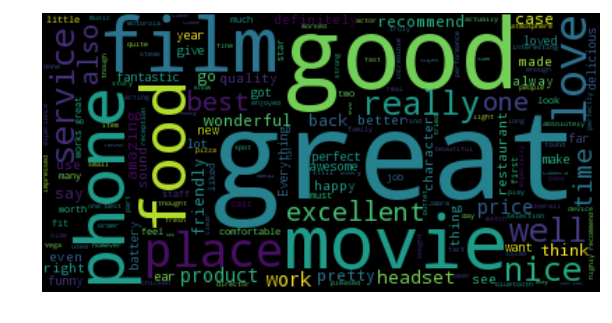

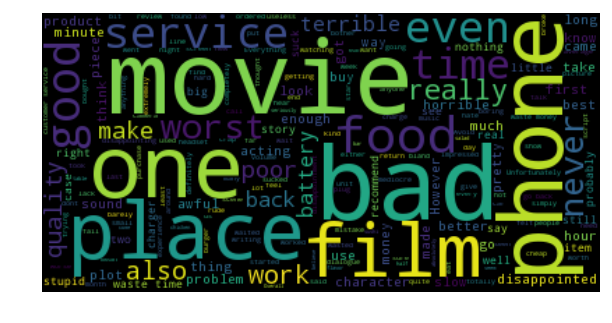

In [56]:
psentence = X['Unigrams'][X['Score'] == "Positive"]
nsentence = X['Unigrams'][X['Score'] == "Negative"]

ta.plot_word_cloud(psentence.to_string())
ta.plot_word_cloud(nsentence.to_string())

### 5.3 Feature subset selection

In [57]:
# New vectorizer Data Set
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.Sentence)

In [58]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(X[4:5].Sentence)))

['the', 'mic', 'is', 'great']

In [59]:
# Ceck the shape of this matrix:
X_counts.shape

(2983, 5155)

In [60]:
X[0:10]

,Source,Sentence,Score,Unigrams
0,amazon_cells,So there is no way for me to plug it in here i...,Negative,"[So, way, plug, US, unless, I, go, converter, .]"
1,amazon_cells,"Good case, Excellent value.",Positive,"[Good, case, ,, Excellent, value, .]"
2,amazon_cells,Great for the jawbone.,Positive,"[Great, jawbone, .]"
3,amazon_cells,Tied to charger for conversations lasting more...,Negative,"[Tied, charger, conversations, lasting, 45, mi..."
4,amazon_cells,The mic is great.,Positive,"[The, mic, great, .]"
5,amazon_cells,I have to jiggle the plug to get it to line up...,Negative,"[I, jiggle, plug, get, line, right, get, decen..."
6,amazon_cells,If you have several dozen or several hundred c...,Negative,"[If, several, dozen, several, hundred, contact..."
7,amazon_cells,If you are Razr owner...you must have this!,Positive,"[If, Razr, owner, ..., must, !]"
8,amazon_cells,"Needless to say, I wasted my money.",Negative,"[Needless, say, ,, I, wasted, money, .]"
9,amazon_cells,What a waste of money and time!.,Negative,"[What, waste, money, time, !, .]"


In [61]:
X_counts[0:10].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [62]:

plot_x_100 = ["term_"+str(i) for i in count_vect.get_feature_names()[0:100]]

In [63]:
plot_y_100 = ["doc_"+ str(i) for i in list(X.index)[0:100]]

In [64]:
plot_z_100 = X_counts[0:100, 0:100].toarray()

In [65]:
# plot using only 100 docs and 100 terms
py.iplot(ta.plot_heat_map(plot_x_100, plot_y_100, plot_z_100))

<hr>

# Exercise 3: 

Modify the code above to plot the entire sample of it.

In [66]:
# New vectorizer Data Set
count_sample_vect = CountVectorizer()
X_sample_counts = count_sample_vect.fit_transform(X_sample.Sentence)

In [67]:
X_sample_counts.shape

(1000, 2613)

In [68]:
X_sample_counts[0:10].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [69]:
plot_x = ["term_"+str(i) for i in count_sample_vect.get_feature_names()]
plot_y = ["doc_"+ str(i) for i in list(X_sample.index)]

In [70]:
len(plot_x)

2613

In [71]:
len(plot_y)

1000

In [72]:
plot_z = X_sample_counts[0:1000, 0:2546].toarray()

In [73]:
# to plot using the entire sample term-document matrix
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

The draw time for this plot will be slow for all clients.


/Users/abnertellez/anaconda/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



<hr>

## 5.4 Dimensionality Reduction

In [74]:
from sklearn.decomposition import PCA

In [75]:
X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())

In [76]:
X_reduced.shape

(2983, 3)

In [77]:
trace1 = ta.get_trace(X_reduced, X["Score"], "Positive", "rgb(71,233,163)") # Positive sentences
trace2 = ta.get_trace(X_reduced, X["Score"], "Negative", "rgb(52,133,252)") # Negative sentences

In [78]:
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

## 5.5 Atrribute Transformation / Aggregation

In [79]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray())[0])

In [80]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

In [81]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [82]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies_log], "Term Frequency Distribution"))

<hr>

# Exercise 4 and 5
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order.

In [83]:
a = np.array(term_frequencies)

In [84]:
stack_terms = np.column_stack((count_vect.get_feature_names(), (a.astype(np.object))))

In [85]:
stack_terms = sorted(stack_terms, key=lambda x:x[1], reverse=True)

In [86]:
len(stack_terms)

5155

In [87]:
# reduce the number of terms deleting stops words
terms = dmh.reduce_words(stack_terms,15)

In [88]:
len(terms)

214

In [98]:
py.iplot(ta.plot_word_frequency([np.array(terms)[:,0],np.array(terms)[:,1]], "Term Frequency Distribution"))

In [90]:
new_words = []
for d in terms:
    d[1]=math.log(d[1])
    new_words.append(d)

In [99]:
py.iplot(ta.plot_word_frequency([np.array(new_words)[:,0],np.array(new_words)[:,1]], "Log Term Frequency Distribution"))

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 public charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

<hr>

## 5.6 Discretization and Binarization

In [92]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [93]:
mlb = preprocessing.LabelBinarizer()

In [94]:
mlb.fit(X.Score)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [95]:
mlb.classes_

array(['Negative', 'Positive'], 
      dtype='<U8')

In [96]:
X['bin_category'] = mlb.transform(X['Score']).tolist()

In [97]:
X[0:9]

,Source,Sentence,Score,Unigrams,bin_category
0,amazon_cells,So there is no way for me to plug it in here i...,Negative,"[So, way, plug, US, unless, I, go, converter, .]",[0]
1,amazon_cells,"Good case, Excellent value.",Positive,"[Good, case, ,, Excellent, value, .]",[1]
2,amazon_cells,Great for the jawbone.,Positive,"[Great, jawbone, .]",[1]
3,amazon_cells,Tied to charger for conversations lasting more...,Negative,"[Tied, charger, conversations, lasting, 45, mi...",[0]
4,amazon_cells,The mic is great.,Positive,"[The, mic, great, .]",[1]
5,amazon_cells,I have to jiggle the plug to get it to line up...,Negative,"[I, jiggle, plug, get, line, right, get, decen...",[0]
6,amazon_cells,If you have several dozen or several hundred c...,Negative,"[If, several, dozen, several, hundred, contact...",[0]
7,amazon_cells,If you are Razr owner...you must have this!,Positive,"[If, Razr, owner, ..., must, !]",[1]
8,amazon_cells,"Needless to say, I wasted my money.",Negative,"[Needless, say, ,, I, wasted, money, .]",[0]
